## Importar librerias

In [1]:
#EDA
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)  
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import math

#Data viz
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
color_pal = sns.color_palette()
plt.style.use('fivethirtyeight')

import os
import sys

In [2]:
from eda import Generate_heatmap_graph

## Lectura de datos

Fall dataset

In [3]:
fall_df = pd.read_csv('../../final_data/fall_dataset_standard_thunder_movenet/fall.csv')

In [4]:
fall_df.shape

(7475, 53)

No fall dataset

In [5]:
no_fall = pd.read_csv('../../final_data/fall_dataset_standard_thunder_movenet/no fall.csv')

In [6]:
no_fall.shape

(18837, 53)

## Join de archivos

In [7]:
# Concat de ambos dataframes
df = pd.concat([fall_df,no_fall])

# Borramos columna image path qeu no sirve
df.drop(columns=['image_path'],inplace=True)

# Mapeo de target
df['target'] = df.target.replace({'fall':1, 'no fall':0})

## EDA

Para cada una de las 17 partes del cuerpo:

- X: posicion en eje X del keypoint
- Y: posicion en eje Y del keypoint
- Score: confianza

In [8]:
df.head()

,nose_x,nose_y,nose_score,left_eye_x,left_eye_y,left_eye_score,right_eye_x,right_eye_y,right_eye_score,left_ear_x,left_ear_y,left_ear_score,right_ear_x,right_ear_y,right_ear_score,left_shoulder_x,left_shoulder_y,left_shoulder_score,right_shoulder_x,right_shoulder_y,right_shoulder_score,left_elbow_x,left_elbow_y,left_elbow_score,right_elbow_x,right_elbow_y,right_elbow_score,left_wrist_x,left_wrist_y,left_wrist_score,right_wrist_x,right_wrist_y,right_wrist_score,left_hip_x,left_hip_y,left_hip_score,right_hip_x,right_hip_y,right_hip_score,left_knee_x,left_knee_y,left_knee_score,right_knee_x,right_knee_y,right_knee_score,left_ankle_x,left_ankle_y,left_ankle_score,right_ankle_x,right_ankle_y,right_ankle_score,target
0,0.58,0.37,0.62,0.56,0.37,0.50,0.58,0.35,0.72,0.54,0.38,0.49,0.58,0.33,0.53,0.51,0.44,0.53,0.63,0.33,0.36,0.53,0.52,0.54,0.70,0.34,0.72,0.59,0.54,0.20,0.75,0.41,0.57,0.61,0.59,0.34,0.71,0.54,0.37,0.62,0.71,0.10,0.71,0.62,0.10,0.62,0.85,0.16,0.75,0.70,0.02,1
1,0.60,0.34,0.66,0.57,0.34,0.51,0.60,0.32,0.64,0.54,0.35,0.63,0.60,0.30,0.52,0.52,0.41,0.51,0.64,0.31,0.61,0.56,0.54,0.31,0.71,0.33,0.52,0.60,0.61,0.18,0.76,0.41,0.48,0.60,0.59,0.41,0.69,0.54,0.32,0.61,0.70,0.09,0.71,0.63,0.08,0.64,0.75,0.13,0.68,0.68,0.08,1
2,0.60,0.32,0.63,0.58,0.32,0.55,0.60,0.30,0.67,0.55,0.32,0.59,0.60,0.28,0.64,0.52,0.37,0.69,0.66,0.29,0.62,0.53,0.42,0.54,0.73,0.34,0.41,0.55,0.49,0.38,0.77,0.42,0.52,0.58,0.52,0.41,0.68,0.49,0.42,0.60,0.68,0.21,0.69,0.64,0.20,0.62,0.81,0.16,0.63,0.81,0.11,1
3,0.61,0.30,0.57,0.59,0.31,0.64,0.61,0.29,0.68,0.56,0.31,0.69,0.60,0.27,0.61,0.53,0.35,0.58,0.66,0.28,0.56,0.52,0.42,0.41,0.73,0.33,0.40,0.55,0.48,0.37,0.76,0.40,0.53,0.58,0.50,0.40,0.66,0.47,0.43,0.61,0.67,0.17,0.69,0.63,0.16,0.63,0.79,0.13,0.65,0.70,0.18,1
4,0.60,0.30,0.63,0.58,0.31,0.69,0.60,0.29,0.75,0.55,0.32,0.70,0.60,0.28,0.65,0.53,0.37,0.70,0.66,0.28,0.72,0.54,0.45,0.39,0.73,0.35,0.45,0.57,0.50,0.16,0.76,0.42,0.49,0.59,0.51,0.47,0.67,0.47,0.32,0.61,0.67,0.14,0.71,0.63,0.12,0.65,0.78,0.09,0.68,0.73,0.07,1


In [9]:
print(f'Número de filas: {df.shape[0]}, Número de columnas:{df.shape[1]}')

Número de filas: 26312, Número de columnas:52


28% del target, podría ser peor

In [10]:
round(df.target.mean(),2)

0.28

Sin nulos

In [11]:
df.isna().sum().sum()

0

Separacion de columnas para graficar por subset

In [12]:
x_y_cols = list(filter(lambda x: "score" not in x and x!='target', df.columns))
x_score = list(filter(lambda x: "score" in x or 'x' in x, df.columns))
y_score = list(filter(lambda x: "score" in x or 'y' in x, df.columns))
x_cols = list(filter(lambda x: "x" in x , df.columns))
y_cols = list(filter(lambda x: "_y" in x , df.columns))
score_cols = list(filter(lambda x: "score" in x, df.columns))

Distribuciones, cortadas por target

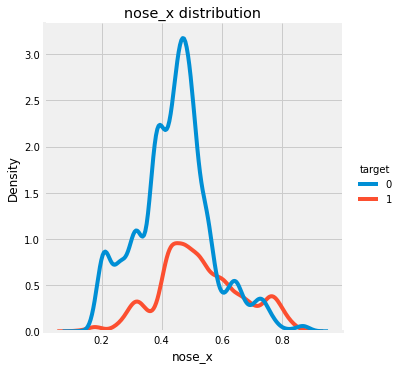

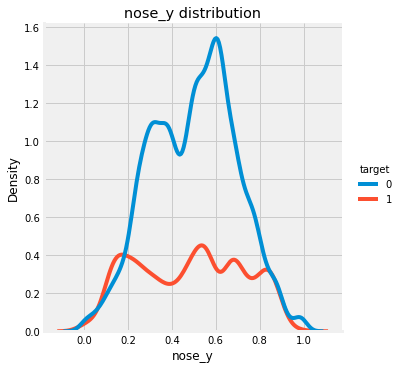

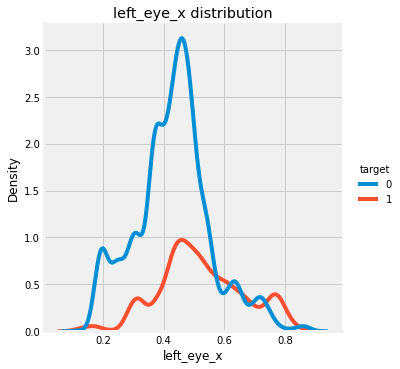

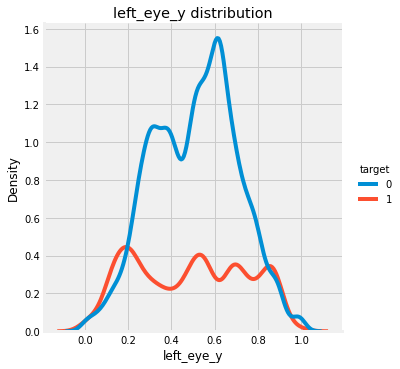

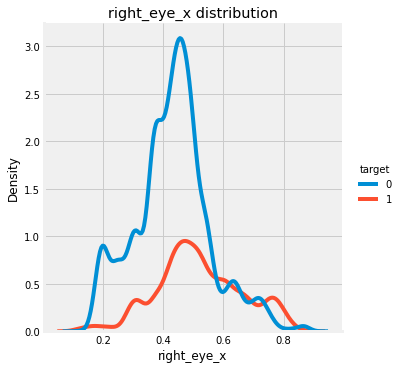

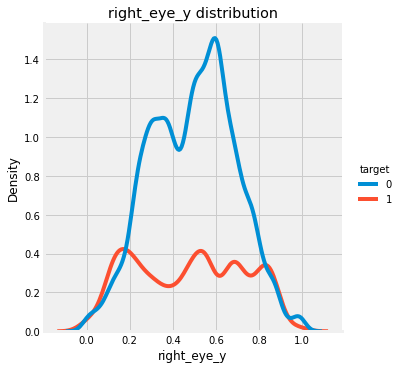

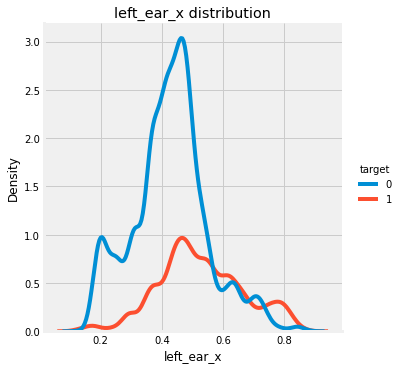

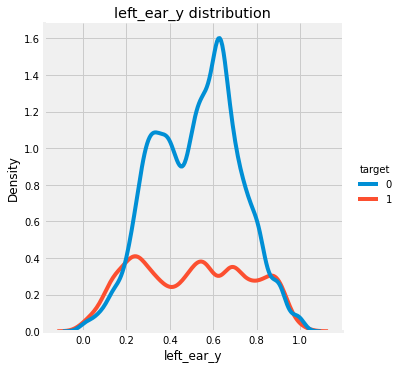

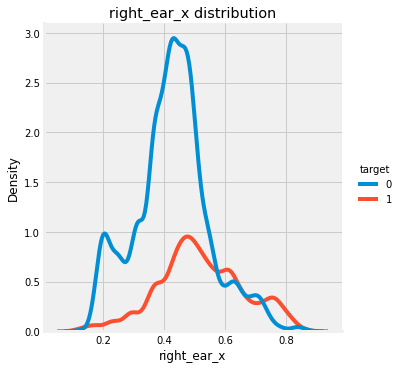

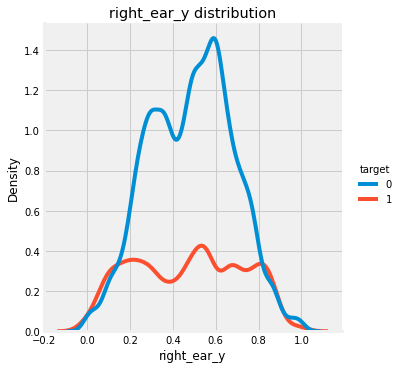

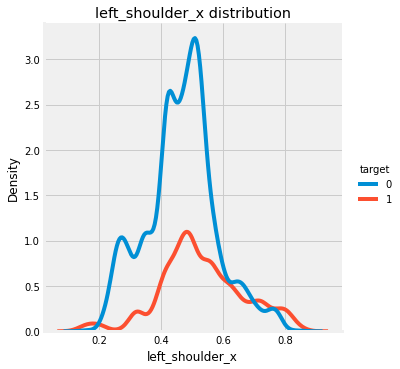

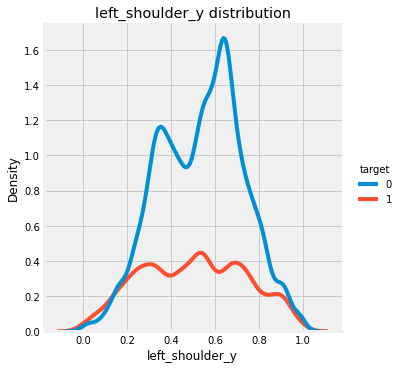

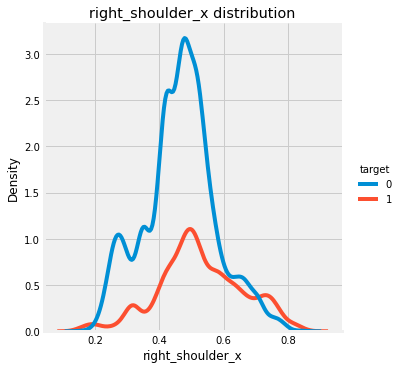

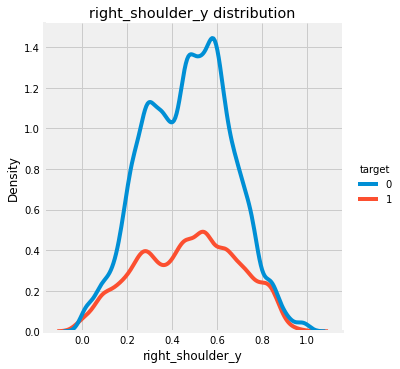

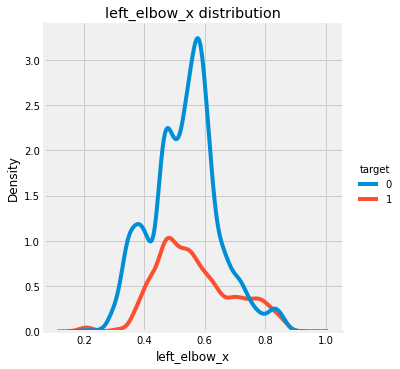

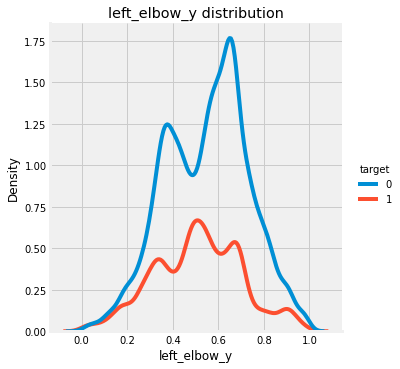

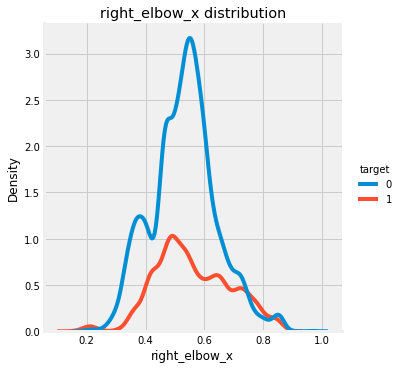

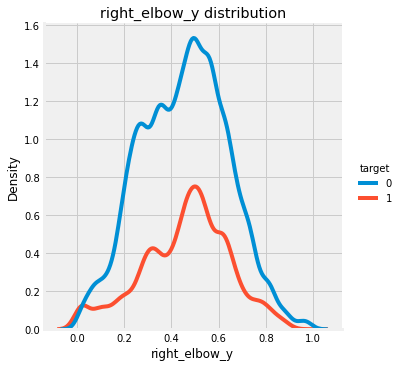

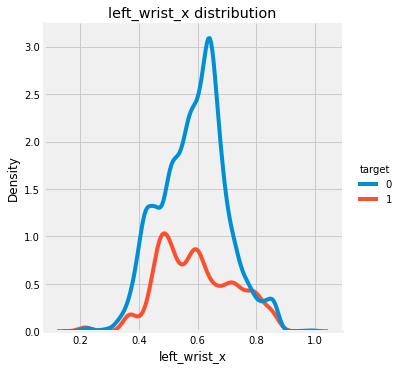

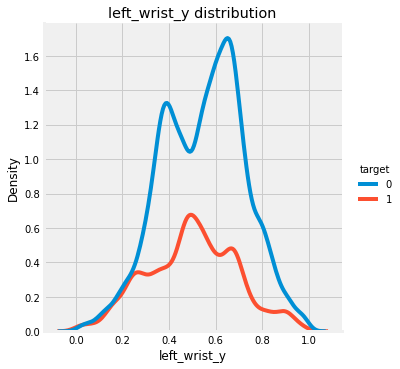

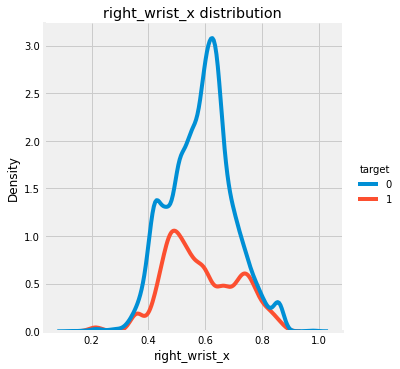

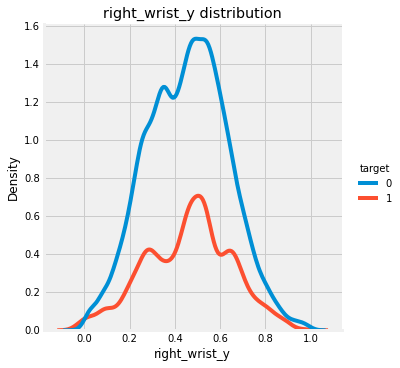

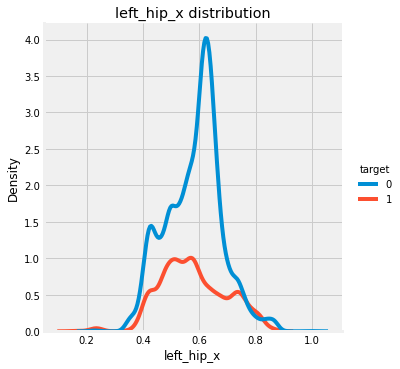

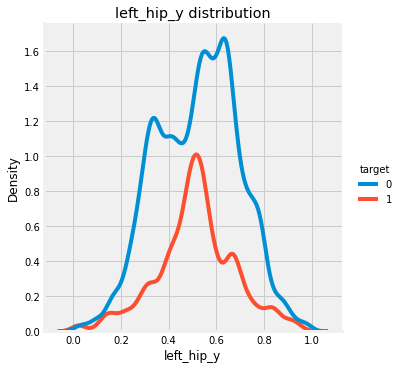

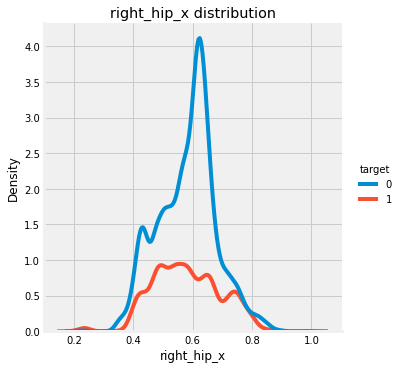

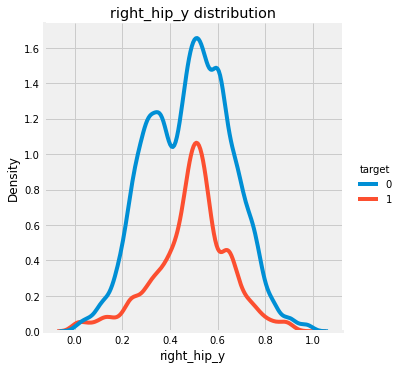

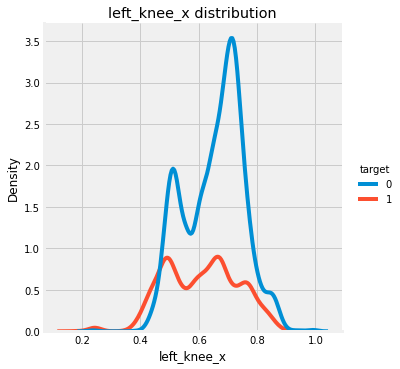

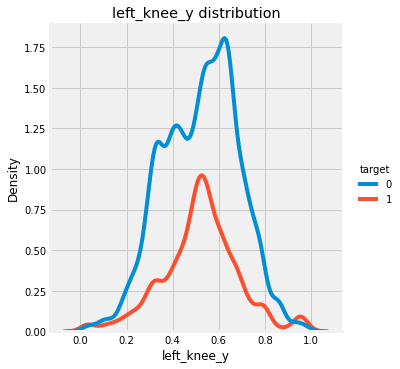

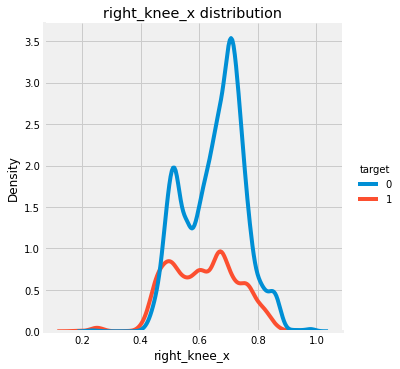

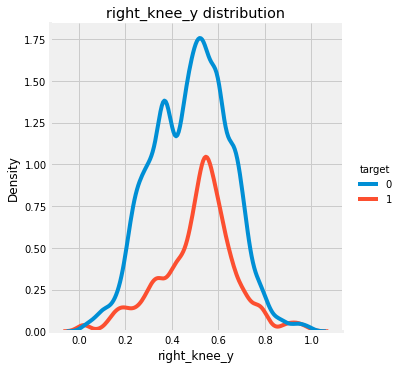

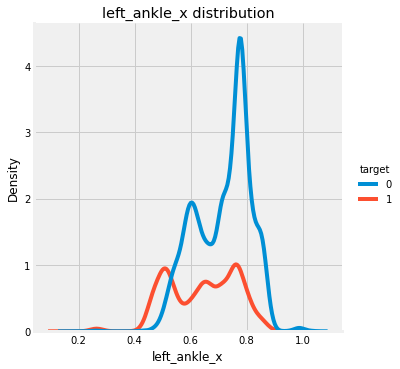

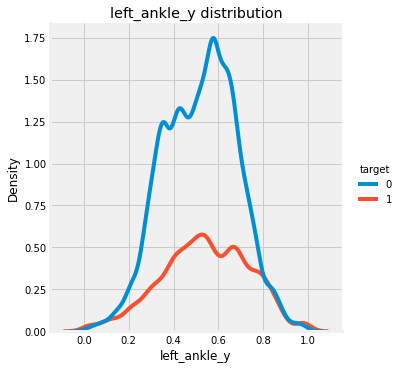

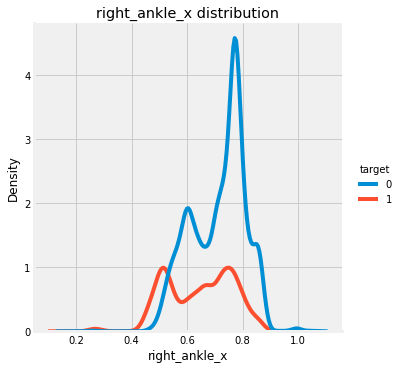

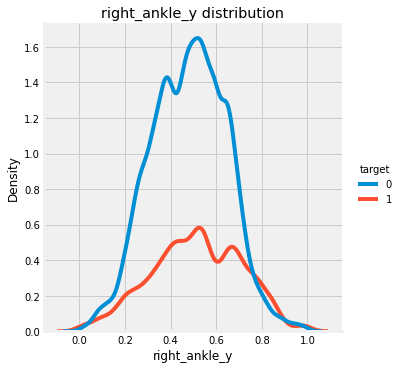

In [20]:
for col in x_y_cols:
    sns.displot(data=df, x=col, hue='target', kind="kde")
    plt.title(f'{col} distribution')
    plt.show()

### Correlacioens

Correlacion negativa Target y Scores

- Partes del cuerpo si te caes pasan a estar cubiertas, entonces menor score

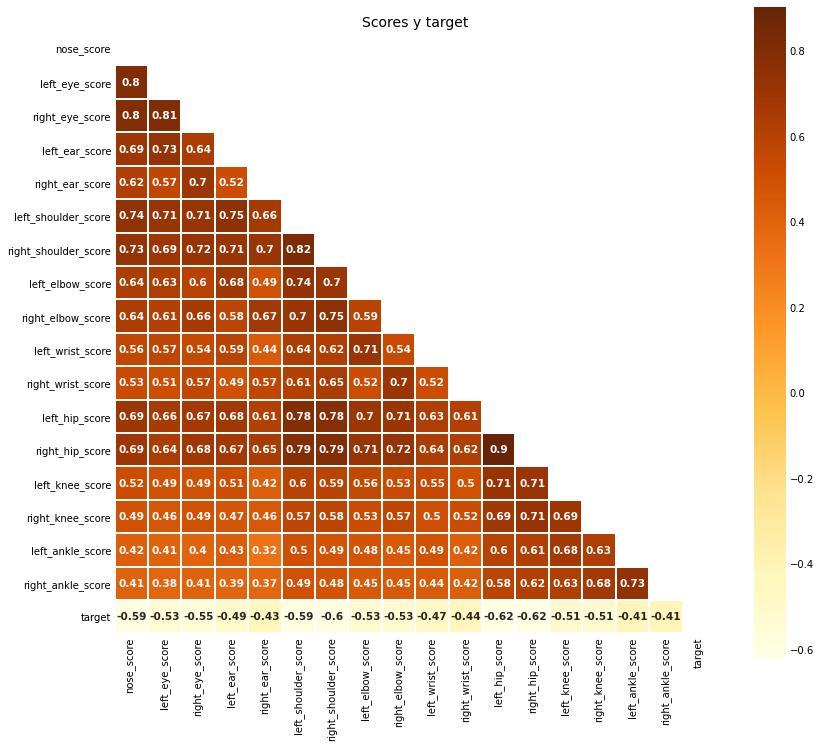

In [13]:
Generate_heatmap_graph(df[score_cols + ['target']].corr(),'Scores y target',True)

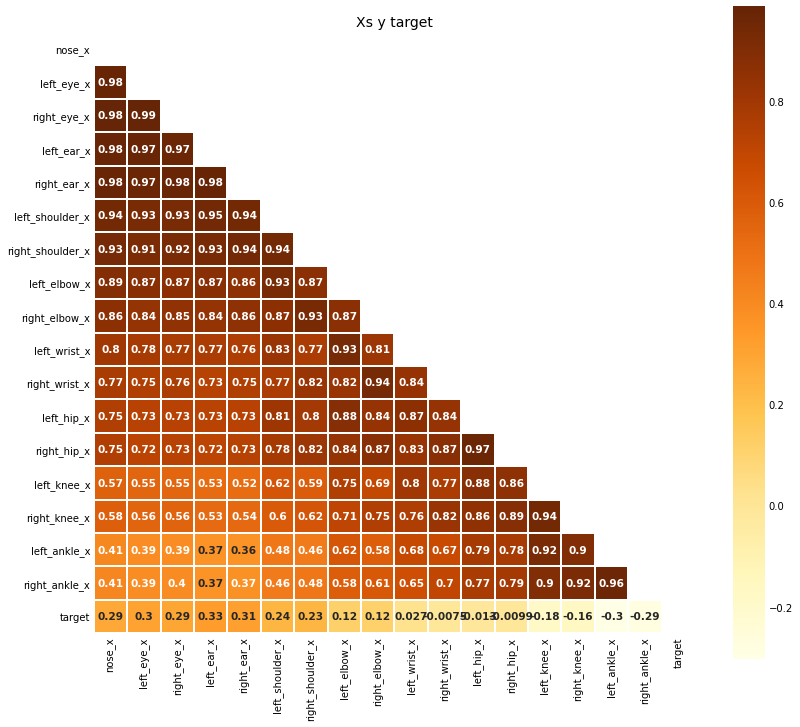

In [14]:
Generate_heatmap_graph(df[x_cols + ['target']].corr(),'Xs y target',True)

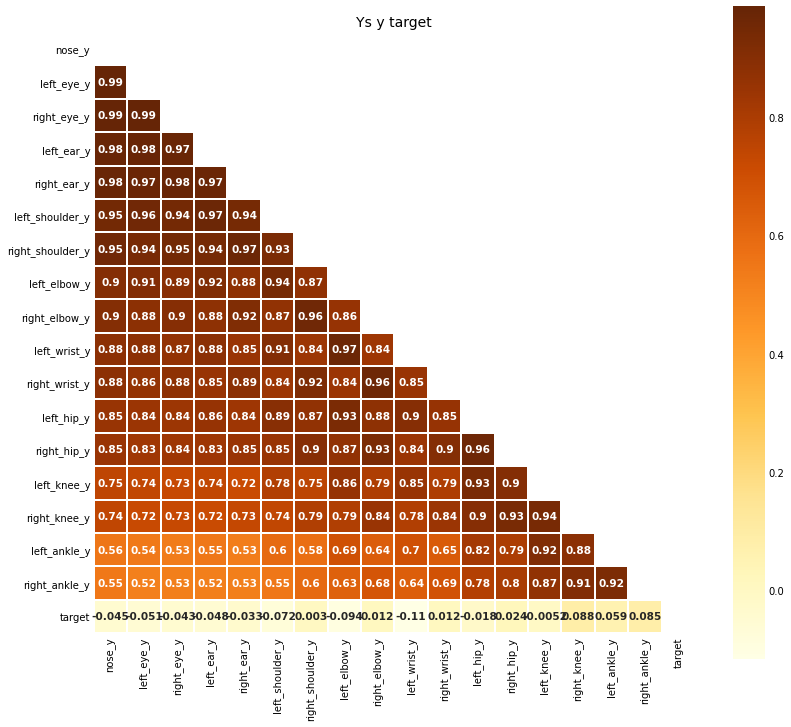

In [15]:
Generate_heatmap_graph(df[y_cols + ['target']].corr(),'Ys y target',True)

## Modelo

In [12]:
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

seed = 42

In [13]:
X = df.drop(columns=['target'])
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = seed)
X_train.shape, X_test.shape

((21049, 51), (5263, 51))

In [15]:
y_train.mean() , y_test.mean()

(0.2836239251270844, 0.28595857875736275)

In [17]:
%%time

rf = RandomForestClassifier(random_state=seed)
rf.fit(X_train,y_train)

# Predicciones para Train
preds_train = rf.predict(X_train)
auc_train = roc_auc_score(y_train,preds_train)

# Predicciones para Test
preds_test = rf.predict(X_test)
auc_test = roc_auc_score(y_test,preds_test)

print(f'AUC train: {round(auc_train,3)}, AUC test:{round(auc_test,3)}')

AUC train: 1.0, AUC test:0.964
Wall time: 16.5 s


In [18]:
print(classification_report(y_test,preds_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98      3758
           1       0.93      0.96      0.94      1505

    accuracy                           0.97      5263
   macro avg       0.96      0.96      0.96      5263
weighted avg       0.97      0.97      0.97      5263



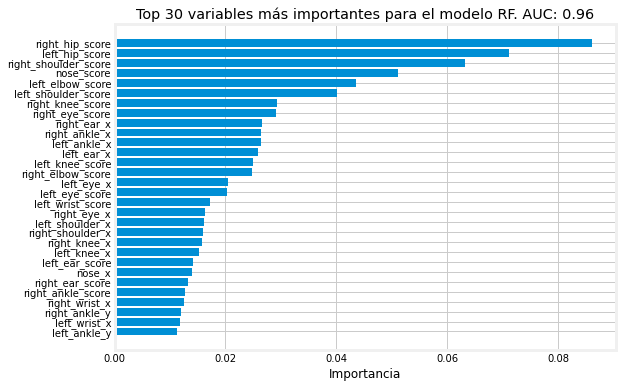

In [19]:
importances = pd.DataFrame({'feature': X_train.columns,
                            'importance': rf.feature_importances_})

# Sort the dataframe by feature importance
importances = importances.sort_values('importance', ascending=False)

# Define the number of features to plot
num_features = 30

# Plot the feature importances
plt.figure(figsize=(8, 6))
plt.rcParams['axes.facecolor'] = 'white'
plt.barh(range(num_features), importances['importance'][:num_features][::-1], align='center')
plt.yticks(range(num_features), importances['feature'][:num_features][::-1])
plt.xlabel('Importancia')
plt.title(f'Top {num_features} variables más importantes para el modelo RF. AUC: {round(auc_test,2)}')

plt.show()

## CV

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

rf = RandomForestClassifier(random_state=seed)
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=seed)

scores = cross_val_score(rf, X, y, cv=cv, scoring='roc_auc')
scores

array([0.99294732, 0.99467216, 0.99530308, 0.99419586, 0.99386929])

In [23]:
scores.mean()

0.9941975414896206